<a href="https://colab.research.google.com/github/kapibara3chi/CooccurrenceAndWordCloud/blob/main/CooccurrenceNetworkAndWordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install spacy
!pip install pandas
!pip install matplotlib
!pip install networkx
!pip install wordcloud
# !pip install -U ginza ja_ginza_electra
!pip install ginza
!pip install plantuml
!pip install ginza ja_ginza
!pip install japanize-matplotlib
!pip install plotly
# 「IPA」フォントをインストール
!apt-get -y install fonts-ipafont-gothic
# matplotlibのキャッシュをクリア
!rm /root/.cache/matplotlib/fontlist-v300.json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 16.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
rm: cannot remove '/root/.cache/matplotlib/fontlist-v300.json': No such file or directory


{'首相': 3, '感染': 1, '拡大': 1, '防止': 1, '全力': 1, '延長': 1, '五輪': 2, '海外': 1, '観客': 1, '受け入れ': 1, '断念': 1, '政府': 1, 'IOC': 1, '最終': 1, '調整': 1, '中止': 1, '発言': 1, '反響': 1, '与党内': 1, '選択肢': 1, 'モデル': 1, '評価': 1, '医療': 1, '提供': 1, '体制': 1, '分析': 1, '改善': 1, '要請': 1, 'コロナ禍': 1, '安心': 1, '自動': 1, '運転': 1, 'バス': 1, '実証': 1, '実験': 1, '開始': 1}


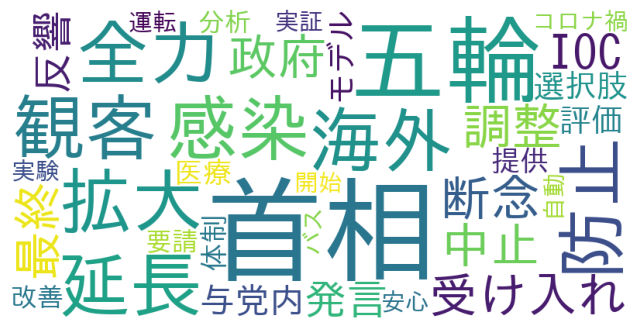

{('感染', '首相'): 1, ('拡大', '首相'): 1, ('防止', '首相'): 1, ('全力', '首相'): 1, ('延長', '首相'): 1, ('感染', '拡大'): 1, ('感染', '防止'): 1, ('全力', '感染'): 1, ('延長', '感染'): 1, ('拡大', '防止'): 1, ('全力', '拡大'): 1, ('延長', '拡大'): 1, ('全力', '防止'): 1, ('延長', '防止'): 1, ('全力', '延長'): 1, ('五輪', '海外'): 1, ('五輪', '観客'): 1, ('五輪', '受け入れ'): 1, ('五輪', '断念'): 1, ('五輪', '政府'): 1, ('IOC', '五輪'): 1, ('五輪', '最終'): 1, ('五輪', '調整'): 1, ('海外', '観客'): 1, ('受け入れ', '海外'): 1, ('断念', '海外'): 1, ('政府', '海外'): 1, ('IOC', '海外'): 1, ('最終', '海外'): 1, ('海外', '調整'): 1, ('受け入れ', '観客'): 1, ('断念', '観客'): 1, ('政府', '観客'): 1, ('IOC', '観客'): 1, ('最終', '観客'): 1, ('観客', '調整'): 1, ('受け入れ', '断念'): 1, ('受け入れ', '政府'): 1, ('IOC', '受け入れ'): 1, ('受け入れ', '最終'): 1, ('受け入れ', '調整'): 1, ('政府', '断念'): 1, ('IOC', '断念'): 1, ('断念', '最終'): 1, ('断念', '調整'): 1, ('IOC', '政府'): 1, ('政府', '最終'): 1, ('政府', '調整'): 1, ('IOC', '最終'): 1, ('IOC', '調整'): 1, ('最終', '調整'): 1, ('中止', '五輪'): 1, ('五輪', '首相'): 1, ('五輪', '発言'): 1, ('五輪', '反響'): 1, ('与党内', '五輪'): 1, ('五輪', '選択肢'): 1, ('中止

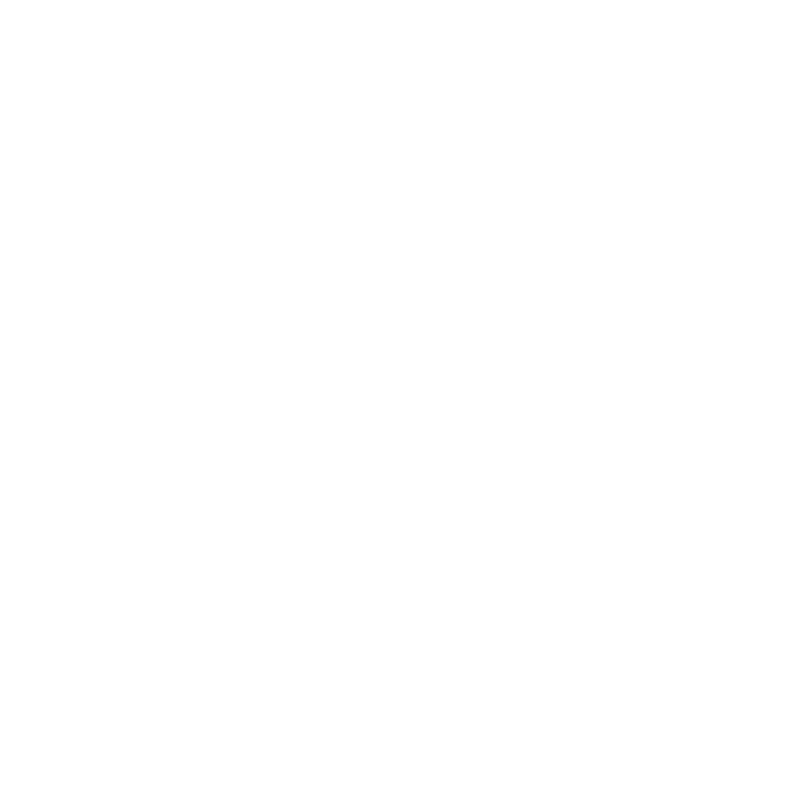

In [23]:
# 必要なライブラリをインポート
import ginza
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud
import japanize_matplotlib
# import seaborn as sns
import plotly.graph_objects as go

# GInzaのモデルをロード
nlp = spacy.load("ja_ginza")
# nlp = spacy.load('ja_ginza_electra')

# 分析対象テキスト例として、Yahoo!ニュースのタイトルを用意[^3^][3]
text = """
首相「感染拡大防止に全力」　緊急事態宣言延長へ
東京五輪、海外観客受け入れ断念　政府、IOCと最終調整
「五輪中止も」首相発言に反響　与党内からも「選択肢に」
菅首相「大阪モデル」評価　医療提供体制の分析・改善要請
「コロナ禍でも安心」　東京・渋谷で自動運転バス、実証実験開始
"""

# テキストを文単位に分割し、形態素解析を行う
docs = [nlp(sent) for sent in text.split("\n") if sent]

# 名詞と動詞だけを抽出し、分かち書きしたリストを作成
words = []
for doc in docs:
    words.extend([token.lemma_ for token in doc if token.pos_ in ["NOUN", "VERB"]])

# Word Cloudを作成するための辞書を作成（単語と出現回数のペア）
word_dict = {}
for word in words:
    word_dict[word] = word_dict.get(word, 0) + 1
print(word_dict)
# Word Cloudのオブジェクトを作成
fpath = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf' # フォント指定
# f_path="C:\Windows\Fonts\meiryo.ttc"
wc = WordCloud(width=800, height=400, background_color="white", font_path=fpath)

# Word Cloudに辞書を渡して描画
wc.generate_from_frequencies(word_dict)
plt.figure(figsize=(8,5))
plt.imshow(wc)
plt.axis("off")
plt.show()

# word_dictをpandasのデータフレームに変換
df = pd.DataFrame(list(word_dict.items()), columns=["word", "freq"])

# 棒グラフのオブジェクトを作成
fig = go.Figure(data=go.Bar(x=df["word"], y=df["freq"]))

# 棒グラフの表示
fig.show()

# 共起ネットワークを作成するための辞書を作成（単語のペアと共起回数のペア）
co_dict = {}
for doc in docs:
    tokens = [token.lemma_ for token in doc if token.pos_ in ["NOUN", "VERB"]]
    for i in range(len(tokens) - 1):
        for j in range(i + 1, len(tokens)):
            pair = tuple(sorted([tokens[i], tokens[j]]))
            co_dict[pair] = co_dict.get(pair, 0) + 1

print(co_dict)
# 共起ネットワークのオブジェクトを作成
G = nx.Graph()

# 共起回数が2以上の単語のペアだけをノードとエッジとして追加
for pair, freq in co_dict.items():
    if freq >= 2:
        G.add_node(pair[0])
        G.add_node(pair[1])
        G.add_edge(pair[0], pair[1], weight=freq)

# 共起ネットワークを描画
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.3) # ノードの位置をばねモデルで決定
nx.draw_networkx(G, pos, font_family="Meiryo", font_size=16,
                 node_color="skyblue", edge_color="gray", width=2) # ネットワークを描画
plt.axis("off")
plt.show()

{'首相': 3, '感染': 1, '拡大': 1, '防止': 1, '全力': 1, '延長': 1, '五輪': 2, '海外': 1, '観客': 1, '受け入れ': 1, '断念': 1, '政府': 1, 'IOC': 1, '最終': 1, '調整': 1, '中止': 1, '発言': 1, '反響': 1, '与党内': 1, '選択肢': 1, 'モデル': 1, '評価': 1, '医療': 1, '提供': 1, '体制': 1, '分析': 1, '改善': 1, '要請': 1, 'コロナ禍': 1, '安心': 1, '自動': 1, '運転': 1, 'バス': 1, '実証': 1, '実験': 1, '開始': 1}
{('感染', '首相'): 1, ('拡大', '首相'): 1, ('防止', '首相'): 1, ('全力', '首相'): 1, ('延長', '首相'): 1, ('感染', '拡大'): 1, ('感染', '防止'): 1, ('全力', '感染'): 1, ('延長', '感染'): 1, ('拡大', '防止'): 1, ('全力', '拡大'): 1, ('延長', '拡大'): 1, ('全力', '防止'): 1, ('延長', '防止'): 1, ('全力', '延長'): 1, ('五輪', '海外'): 1, ('五輪', '観客'): 1, ('五輪', '受け入れ'): 1, ('五輪', '断念'): 1, ('五輪', '政府'): 1, ('IOC', '五輪'): 1, ('五輪', '最終'): 1, ('五輪', '調整'): 1, ('海外', '観客'): 1, ('受け入れ', '海外'): 1, ('断念', '海外'): 1, ('政府', '海外'): 1, ('IOC', '海外'): 1, ('最終', '海外'): 1, ('海外', '調整'): 1, ('受け入れ', '観客'): 1, ('断念', '観客'): 1, ('政府', '観客'): 1, ('IOC', '観客'): 1, ('最終', '観客'): 1, ('観客', '調整'): 1, ('受け入れ', '断念'): 1, ('受け入れ', '政府'): 1, ('IOC',

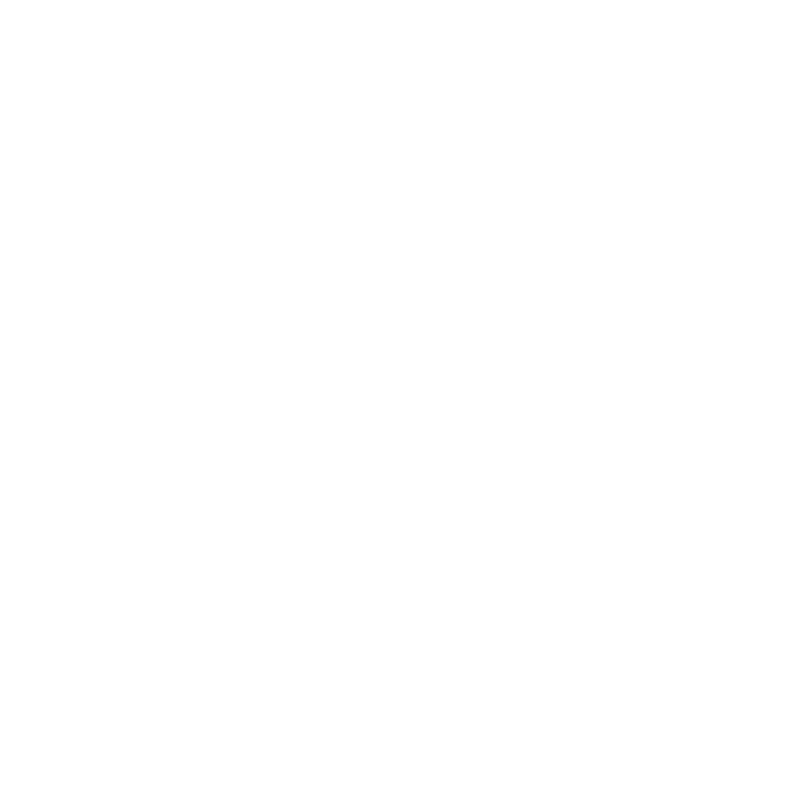

In [24]:
# 必要なライブラリをインポート
import ginza
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from wordcloud import WordCloud
import japanize_matplotlib
# import seaborn as sns
import plotly.graph_objects as go

# GInzaのモデルをロード
nlp = spacy.load("ja_ginza")
# nlp = spacy.load('ja_ginza_electra')

# 分析対象テキスト例として、Yahoo!ニュースのタイトルを用意[^3^][3]
text = """
首相「感染拡大防止に全力」　緊急事態宣言延長へ
東京五輪、海外観客受け入れ断念　政府、IOCと最終調整
「五輪中止も」首相発言に反響　与党内からも「選択肢に」
菅首相「大阪モデル」評価　医療提供体制の分析・改善要請
「コロナ禍でも安心」　東京・渋谷で自動運転バス、実証実験開始
"""

# テキストを文単位に分割し、形態素解析を行う
docs = [nlp(sent) for sent in text.split("\n") if sent]

# 名詞と動詞だけを抽出し、分かち書きしたリストを作成
words = []
for doc in docs:
    words.extend([token.lemma_ for token in doc if token.pos_ in ["NOUN", "VERB"]])

# Word Cloudを作成するための辞書を作成（単語と出現回数のペア）
word_dict = {}
for word in words:
    word_dict[word] = word_dict.get(word, 0) + 1
print(word_dict)


# 共起ネットワークを作成するための辞書を作成（単語のペアと共起回数のペア）
co_dict = {}
for doc in docs:
    tokens = [token.lemma_ for token in doc if token.pos_ in ["NOUN", "VERB"]]
    for i in range(len(tokens) - 1):
        for j in range(i + 1, len(tokens)):
            pair = tuple(sorted([tokens[i], tokens[j]]))
            co_dict[pair] = co_dict.get(pair, 0) + 1

print(co_dict)
# 共起ネットワークのオブジェクトを作成
G = nx.Graph()

# 共起回数が2以上の単語のペアだけをノードとエッジとして追加
for pair, freq in co_dict.items():
    if freq >= 2:
        G.add_node(pair[0])
        G.add_node(pair[1])
        G.add_edge(pair[0], pair[1], weight=freq)

# 共起ネットワークを描画
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.3) # ノードの位置をばねモデルで決定
nx.draw_networkx(G, pos, font_family="Meiryo", font_size=16,
                 node_color="skyblue", edge_color="gray", width=2) # ネットワークを描画
plt.axis("off")
plt.show()